BY,
JUSTIN biju- c0909122

Karthika- c0905785

Roshan joseph-c0904407

Akshay Rajeevkumar- c0908443

Mishel Kulathinaprayil Sajan - c0908430

Aiswarya Radhakrishna Kamath- c0902385

Joel Tomy George - C0885274

In [22]:
#import necessary libraries and dependancies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


In [24]:
# upload a dataset to colab to access
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (1).csv


In [25]:
#reading the data
df = pd.read_csv('cardio_train.csv', sep=';')
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


Exploratory Data Analysis
1. viewing the data shape,
2. checking for nulls,
3. droping duplicates
4. describing data

In [26]:
df.shape

(70000, 13)

In [27]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [28]:
df.drop_duplicates()
df

# found no duplicates

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#counting the total values in the data
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [32]:
# converting age column to years
df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric(df['years'],downcast='integer')
df['years']

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: years, Length: 70000, dtype: int8

In [33]:
# looking for min and max age and height
print (df['years'].min(), df['years'].max())
print (df['height'].min(), df['height'].max())

30 65
55 250


In [34]:
print ((df['height'] < 120).sum(), (df['height'] > 200).sum())

52 2


In [35]:
df = df[(df['height'] >= 120) & (df['height'] <= 200)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [36]:
 #getting the max values for each feature to use in normalization
df.max()

id             99999.0
age            23713.0
gender             2.0
height           200.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
years             65.0
dtype: float64

In [37]:
# Calculate maximum value for each column
max_values = df.max()

# Normalize the data
df_1 = df / max_values
df_1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0.00000,0.775650,1.0,0.840,0.310,0.006866,0.007273,0.333333,0.333333,0.0,0.0,1.0,0.0,0.769231
1,0.00001,0.853034,0.5,0.780,0.425,0.008739,0.008182,1.000000,0.333333,0.0,0.0,1.0,1.0,0.846154
2,0.00002,0.795218,0.5,0.825,0.320,0.008115,0.006364,1.000000,0.333333,0.0,0.0,0.0,1.0,0.800000
3,0.00003,0.743179,1.0,0.845,0.410,0.009363,0.009091,0.333333,0.333333,0.0,0.0,1.0,1.0,0.738462
4,0.00004,0.736895,0.5,0.780,0.280,0.006242,0.005455,0.333333,0.333333,0.0,0.0,0.0,0.0,0.738462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.99994,0.811369,1.0,0.840,0.380,0.007491,0.007273,0.333333,0.333333,1.0,0.0,1.0,0.0,0.815385
69996,0.99996,0.953106,0.5,0.790,0.630,0.008739,0.008182,0.666667,0.666667,0.0,0.0,1.0,1.0,0.953846
69997,0.99997,0.804032,1.0,0.915,0.525,0.011236,0.008182,1.000000,0.333333,0.0,1.0,0.0,1.0,0.800000
69998,0.99999,0.945937,0.5,0.815,0.360,0.008427,0.007273,0.333333,0.666667,0.0,0.0,0.0,1.0,0.938462


In [38]:
df_1.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003454,0.003551,-0.002739,-0.001493,0.003390,-0.002524,0.006200,0.002480,-0.003549,0.001250,0.003900,0.003823,0.003051
age,0.003454,1.000000,-0.022767,-0.085839,0.054031,0.020762,0.017630,0.154524,0.098753,-0.047592,-0.029645,-0.009974,0.238150,0.999090
gender,0.003551,-0.022767,1.000000,0.517110,0.156005,0.006000,0.015269,-0.035808,-0.020440,0.338197,0.170966,0.005846,0.008215,-0.022976
height,-0.002739,-0.085839,0.517110,1.000000,0.305865,0.005289,0.005707,-0.054374,-0.021079,0.194698,0.097125,-0.007526,-0.011934,-0.085847
weight,-0.001493,0.054031,0.156005,0.305865,1.000000,0.030628,0.043792,0.141826,0.106962,0.067480,0.067046,-0.017067,0.181878,0.054021
ap_hi,0.003390,0.020762,0.006000,0.005289,0.030628,1.000000,0.016077,0.023740,0.011827,-0.000942,0.001398,-0.000045,0.054460,0.020791
ap_lo,-0.002524,0.017630,0.015269,0.005707,0.043792,0.016077,1.000000,0.024000,0.010789,0.005176,0.010595,0.004781,0.065721,0.017736
cholesterol,0.006200,0.154524,-0.035808,-0.054374,0.141826,0.023740,0.024000,1.000000,0.451651,0.010419,0.035849,0.009911,0.221161,0.154481
gluc,0.002480,0.098753,-0.020440,-0.021079,0.106962,0.011827,0.010789,0.451651,1.000000,-0.004743,0.011279,-0.006814,0.089348,0.098645
smoke,-0.003549,-0.047592,0.338197,0.194698,0.067480,-0.000942,0.005176,0.010419,-0.004743,1.000000,0.340168,0.025783,-0.015607,-0.047845


<Axes: >

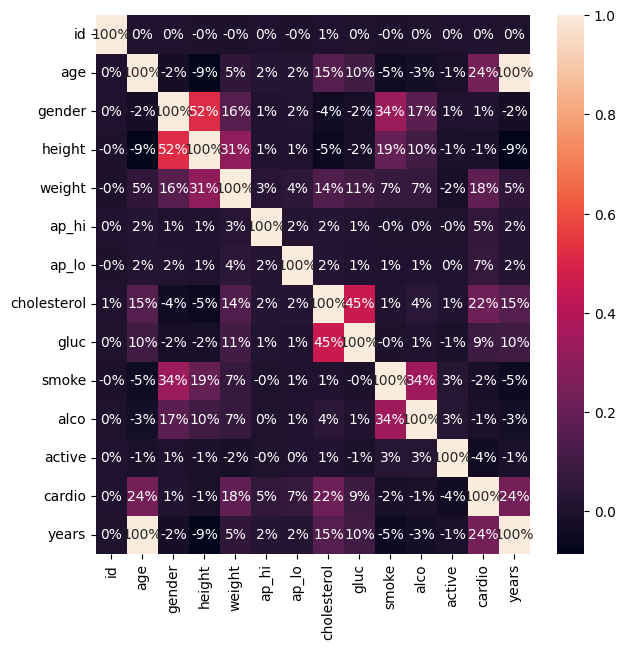

In [39]:
#plotting a correlation matrix
plt.figure(figsize= (7,7))
sns.heatmap(df_1.corr(), annot=True, fmt='.0%')

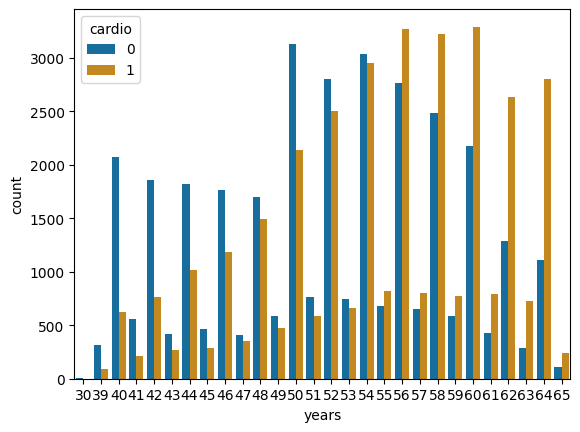

In [40]:
# based on age

sns.countplot(x='years', hue='cardio', data=df, palette='colorblind')
plt.show()

<Axes: >

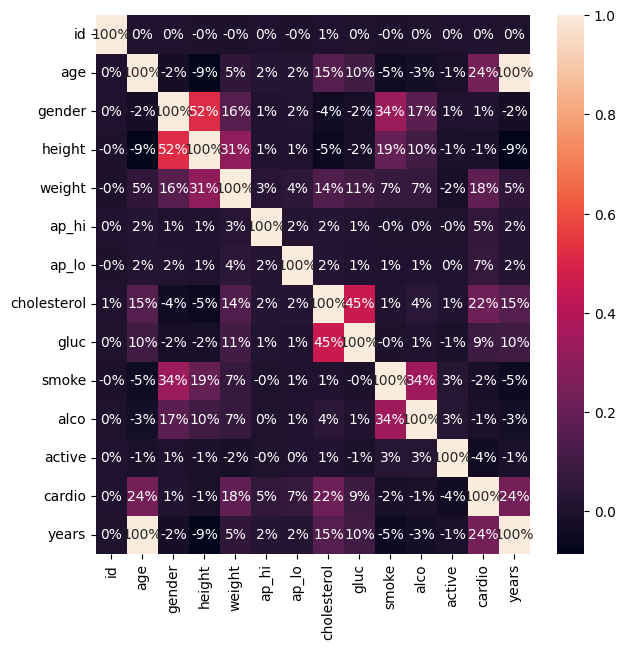

In [41]:
plt.figure(figsize= (7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [42]:
# droping columns which has negligible correlation with target variable
columns_to_drop = ['years', 'id', 'gender', 'height', 'smoke', 'alco', 'active']

df_2 = df_1.drop(columns_to_drop, axis=1)
df_2

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,0.775650,0.310,0.006866,0.007273,0.333333,0.333333,0.0
1,0.853034,0.425,0.008739,0.008182,1.000000,0.333333,1.0
2,0.795218,0.320,0.008115,0.006364,1.000000,0.333333,1.0
3,0.743179,0.410,0.009363,0.009091,0.333333,0.333333,1.0
4,0.736895,0.280,0.006242,0.005455,0.333333,0.333333,0.0
...,...,...,...,...,...,...,...
69995,0.811369,0.380,0.007491,0.007273,0.333333,0.333333,0.0
69996,0.953106,0.630,0.008739,0.008182,0.666667,0.666667,1.0
69997,0.804032,0.525,0.011236,0.008182,1.000000,0.333333,1.0
69998,0.945937,0.360,0.008427,0.007273,0.333333,0.666667,1.0


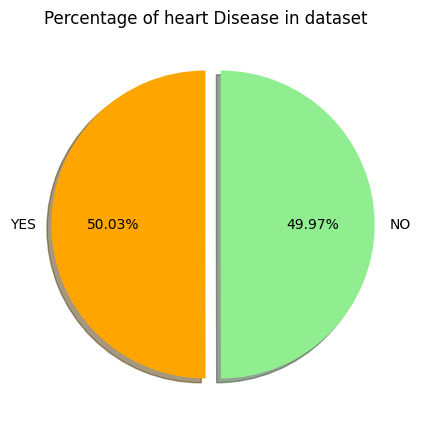

In [43]:
#pie chart -
sizes = df['cardio'].value_counts(sort=True)
colors = ["orange", "lightgreen"]
rcParams['figure.figsize'] = 5, 5  # Set figure size
plt.pie(sizes, explode=(0, 0.1), labels=["YES", "NO"], colors=colors,
        autopct='%.2f%%', shadow=True, startangle=90)

plt.title('Percentage of heart Disease in dataset')
plt.show()


<Axes: >

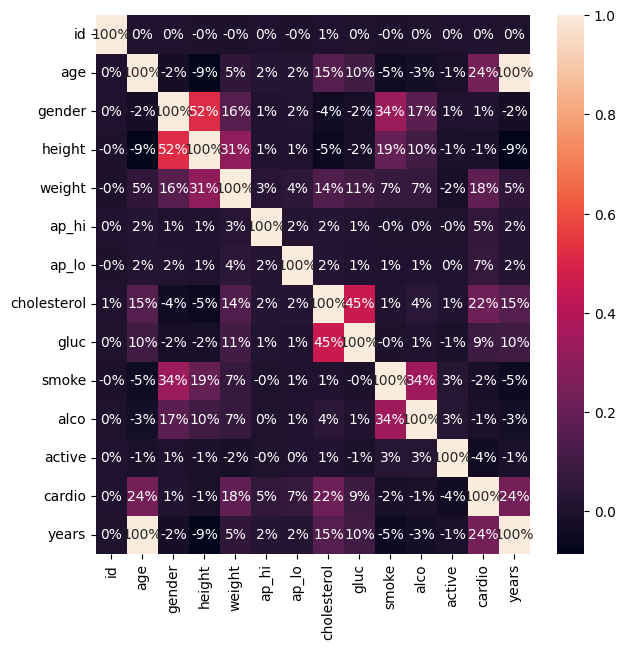

In [44]:

plt.figure(figsize= (7,7))
sns.heatmap(df_1.corr(), annot=True, fmt='.0%')

In [47]:
#split
X = df_2.iloc[:,:-1].values
Y = df_2.iloc[:,-1].values

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Accuracy: 0.745553670485522
Test Accuracy: 0.7332875850631898


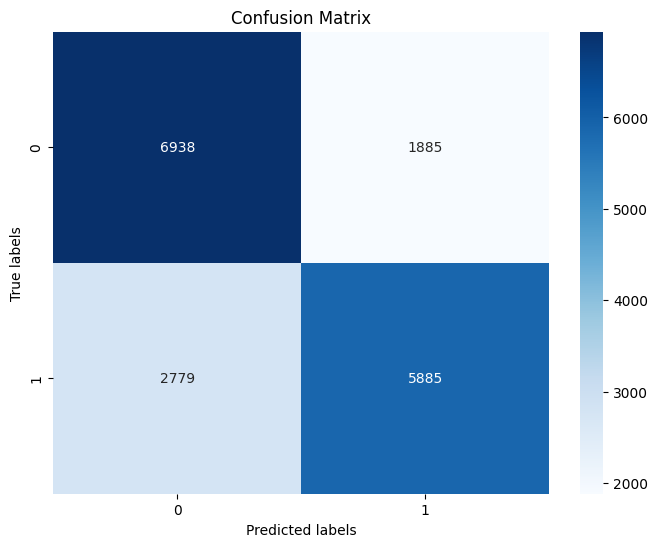

Enter age of the new patient: 89
Enter weight of the new patient: 100
Enter ap_hi of the new patient: 3
Enter ap_lo of the new patient: 5
Enter cholesterol level of the new patient: 7
Enter glucose level of the new patient: 9
The new user is predicted to be a cardiac patient.


In [48]:
# Function to preprocess user input
def preprocess_user_input(user_input, scaler):
    user_data = np.array(user_input).reshape(1, -1)  # Reshape to match scaler's input shape
    user_data_scaled = scaler.transform(user_data)
    return user_data_scaled

# Function to predict whether the new user is a cardiac patient
def predict_cardiac_patient(model, user_data_scaled):
    prediction = model.predict(user_data_scaled)
    if prediction == 1:
        return "The new user is predicted to be a cardiac patient."
    else:
        return "The new user is predicted not to be a cardiac patient."

# Load your data and split into features (X) and target (Y)
# Assuming df_2 contains your data

# Define features (X) and target (Y)
X = df_2.iloc[:, :-1].values
Y = df_2.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train Random Forest classifier with tuned hyperparameters
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_split=5, random_state=1, class_weight='balanced')

# Train BaggingClassifier with Random Forest base estimator
bagging_model = BaggingClassifier(base_estimator=forest, n_estimators=10, random_state=1)

# Fit the model
bagging_model.fit(X_train_scaled, Y_train)

# Accuracy on train data
train_accuracy = bagging_model.score(X_train_scaled, Y_train)
print("Train Accuracy:", train_accuracy)

# Accuracy on test data
test_accuracy = bagging_model.score(X_test_scaled, Y_test)
print("Test Accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(Y_test, bagging_model.predict(X_test_scaled))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Ask user for details of the new patient
user_age = float(input("Enter age of the new patient: "))
user_weight = float(input("Enter weight of the new patient: "))
user_ap_hi = float(input("Enter ap_hi of the new patient: "))
user_ap_lo = float(input("Enter ap_lo of the new patient: "))
user_cholesterol = float(input("Enter cholesterol level of the new patient: "))
user_gluc = float(input("Enter glucose level of the new patient: "))

# Preprocess user input
user_input = [user_age, user_weight, user_ap_hi, user_ap_lo, user_cholesterol, user_gluc]
user_data_scaled = preprocess_user_input(user_input, sc)

# Predict whether the new user is a cardiac patient
prediction = predict_cardiac_patient(bagging_model, user_data_scaled)
print(prediction)
